# Code Assignment 2: Linear Independence & Bases

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1: Linear Independence I

#### Computationally the quickest way to determine if three vectors in $\mathbb R^3$ are linearly independent is to compute their "exterior product", we will see this later when we discuss determinants. 

#### The relevant Theorem is:

#### Given $\vec a$, $\vec b$,$\vec c\in\mathbb R^3$ then the set $\{\vec a,\vec b,\vec c\}$ is linearly independent if and only if their exterior product $\vec a \wedge \vec b\wedge \vec c$ is not zero.

#### The formula for the exterior product is:

\begin{equation}
    \vec a \wedge \vec b\wedge \vec c = a_1 b_2 c_3 + b_1 c_2 a_3 + c_1 a_2 b_3 - a_3 b_2 c_1 - b_3 c_2 a_1 - c_3 a_2 b_1
\end{equation}

### a) Write a function that takes three vectors and returns their exterior product.

In [15]:
''' a = np.array([1,2,3]) b = np.array([4,5,6]) c = np.array([7,8,9]) '''


def exterior_product(a,b,c):
    exterior = a[0]*b[1]*c[2] + a[2]*b[0]*c[1] + a[1]*b[2]*c[0] - a[2]*b[1]*c[0] - a[0]*b[2]*c[1] - a[1]*b[0]*c[2]
    return exterior

In [19]:
a = np.array([1,2,3])
b = np.array([4,5,6])

c = 3*a - 7*b

In [8]:
a * b * c   # (a*b)*c = a*(b*c) * is associative

array([ 28,  80, 162])

In [20]:
exterior_product(a,b,c)

0

### b) Write a function that takes three vectors and returns True if they are lineraly independent and False if not [Hint:Part a might be useful]

In [8]:
def are_linearly_independent(a,b,c):
    are_independet = True
    # Your code goes here
    return are_independent

## Problem 2: Control Flow in Python

#### In this problem we expand on the syntax of if/else clauses.

## a) Complete the following function to return the largest number out of a list of 3 numbers. [Hint: How many possible ways are there to order three numbers?]

In [9]:

#there are 6 ways to order the numbers, but because we only want the largest one this means the code is complete. 
def get_max(a,b,c):
    rval = a
    
    ''' a>b>c '''
    if a>b and b>c:
        rval = a
    
    ''' c>a>b '''
    elif c>a and a>b:
        rval = c
    
    ''' b>c>a '''
    elif b>c and c>a:
        rval = b
        
    ''' a>c>b '''
    
    ''' c>b>a '''
        
    return rval





#### The division algorithm for natural numbers consists of finding the largest number (quotient) that multiplied by the divisor is less than the dividend, if the multiplication is exactly equal to the dividend we say that the division is exact and that the dividend is divisible by the divisor. We call "the residue" of the division the difference between the dividend and the product of the quotient and divisor, hence if the division is exact the residue is zero.

#### For example:

\begin{equation}
    7 = 3 * 2 + 1,
\end{equation}

#### means that the division of 7 by 3 has quotient 2 and residue 1. In python to get the quotient of the division we can use the symbol //, while the residue can be obtained using %.

#### For example:

\begin{align}
    7 // 3 = 2\\
    7 \%  3 = 1,
\end{align}

## b) Complete the following function that takes a number and returns half of it if the number is even (divisible by 2) or returns three times the number plus one if it is odd. [Hint: What residue do odd numbers leave when divided by 2?]

In [12]:
def collatz_map(number):
    result = number
    if number % 2 == 0:
        return number / 2
    else:
        return (number*3)+1
    return result

## Problem 3: Linear Independence of Functions

#### In this problem we investigate a way of representing functions as vectors and how to evaluate things as linear independence of functions by means of this representation. 

#### Consider a function $f(x)$ of a real variable $x\in\mathbb R$ we can build a vector representation for $x$ by evaluating it at some points in its domain, for instance take $f(x)=x^2$ defined in the interval $[0,1]$, one possible vectorization of this function is to evaluate it at ten equidistant points in the interval $[0,1]$:

\begin{equation}
    f_{\text{vec}} = ( 0.1^2,0.2^2,\cdots,0.9^2,1.0^2 ) = (0.01,0.04,\cdots,0.81,1)
\end{equation}

#### which looks like

In [ ]:
x_axis       = [ i/10 for i in range(10) ]
f_vectorized = [ xs**2 for xs in x_axis ]
plt.scatter(x_axis,f_vectorized)
plt.show()

#### as the number of points increases the function looks more "continuous", i.e. the gaps are smaller

In [ ]:
num_points   = 25
x_1 = [ i/num_points for i in range(num_points) ]
x_2 = [ xs**2 for xs in x_axis ]
plt.scatter(x_axis,f_vectorized)
plt.show()

#### If we now wish to express linear independnece between two functions we can do so though the vectorized verisons, for instance consider the functions $\{x,x^2,x^3\}$ with a vectorization with 10 points:

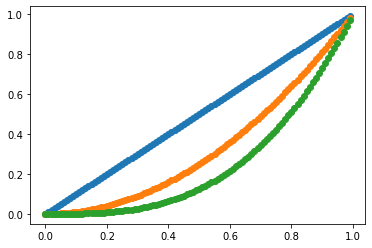

In [32]:
num_points   = 100
x_1 = [ i/num_points for i in range(num_points) ]
x_2 = [ xs**2 for xs in x_1 ]
x_3 = [ xs**3 for xs in x_1 ] 
plt.scatter(x_1,x_1)
plt.scatter(x_1,x_2)
plt.scatter(x_1,x_3)
plt.show()

#### a) Write a linear combination of $\{x,x^2,x^3\}$ that is zero at $1/2$ and display its vectorized version. [Hint: You might want to use paper and pencil to compute the coefficients.]

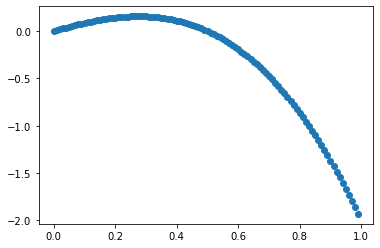

In [37]:
coeff_x1 = 1  # Your constant goes here
coeff_x2 = -1 # Your constant goes here
coeff_x3 = -4*coeff_x1 - 2*coeff_x2  # Your constant goes here

''' System of equations

    (c1 * x + c2 * x^2 + c3 * x^3)(1/2) = 0 

    => c1 * (1/2) + c2 * (1/4) + c3 * (1/8) = 0
    
    (*8) => 4 c1 + 2 c2 + c3 = 0
    
    => c3 = -4 c1 - 2 c2

'''


''' Build the combination using list comprehension '''
combination = [ coeff_x1*x_1[i] + coeff_x2 * x_2[i] + coeff_x3*x_3[i] for i in range(num_points) ]

''' Display the vectorized linear combination '''
plt.scatter(x_1,combination)# Your code goes here
plt.show()

#### b) Write a linear combination of $\{x,x^2,x^3\}$ that is zero at $9/10$ and display its vectorized version. [Hint: You might want to use paper and pencil to compute the coefficients.]

In [ ]:
coeff_x1 = # Your constant goes here
coeff_x2 = # Your constant goes here
coeff_x3 = # Your constant goes here

''' Build the combination using list comprehension '''
combination = # Your code goes here

''' Display the vectorized linear combination '''
# Your code goes here

#### c) Do you think it is possible to find a linear combination of these three functions that vanishes everywhere? Why? [Hint: Think of how many coefficients are there and how many points does the function need to vanish at]